<a href="https://colab.research.google.com/github/airanvillacorta/Transfer_Learning/blob/main/CDI_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

model = VGG16(weights='imagenet', include_top=True)

Mounted at /content/drive
553476096/553467096 [==============================] - 6s 0us/step


In [2]:
decode_predictions(np.expand_dims(np.arange(1000), 0), top=1000)

49152/35363 [=========================================] - 0s 0us/step


[[('n15075141', 'toilet_tissue', 999),
  ('n13133613', 'ear', 998),
  ('n13054560', 'bolete', 997),
  ('n13052670', 'hen-of-the-woods', 996),
  ('n13044778', 'earthstar', 995),
  ('n13040303', 'stinkhorn', 994),
  ('n13037406', 'gyromitra', 993),
  ('n12998815', 'agaric', 992),
  ('n12985857', 'coral_fungus', 991),
  ('n12768682', 'buckeye', 990),
  ('n12620546', 'hip', 989),
  ('n12267677', 'acorn', 988),
  ('n12144580', 'corn', 987),
  ('n12057211', "yellow_lady's_slipper", 986),
  ('n11939491', 'daisy', 985),
  ('n11879895', 'rapeseed', 984),
  ('n10565667', 'scuba_diver', 983),
  ('n10148035', 'groom', 982),
  ('n09835506', 'ballplayer', 981),
  ('n09472597', 'volcano', 980),
  ('n09468604', 'valley', 979),
  ('n09428293', 'seashore', 978),
  ('n09421951', 'sandbar', 977),
  ('n09399592', 'promontory', 976),
  ('n09332890', 'lakeside', 975),
  ('n09288635', 'geyser', 974),
  ('n09256479', 'coral_reef', 973),
  ('n09246464', 'cliff', 972),
  ('n09229709', 'bubble', 971),
  ('n091937

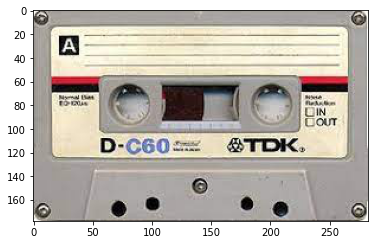

In [3]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/datasets/images/cassette.jpg', 'r')
imshow(np.asarray(pil_im))

In [4]:
img_path = '/content/drive/My Drive/Colab Notebooks/datasets/images/cassette.jpg'

img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
results = decode_predictions(features, top=5)
print(results)

[[('n02978881', 'cassette', 0.9241361), ('n02979186', 'cassette_player', 0.03891445), ('n04392985', 'tape_player', 0.036407202), ('n04041544', 'radio', 0.00023343778), ('n03425413', 'gas_pump', 0.00013967071)]]


In [5]:
# DATA SOURCE --------------------------------------------------

image_size = (224, 224)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/Colab Notebooks/datasets/dogs_vs_cats/",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='binary'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/Colab Notebooks/datasets/dogs_vs_cats/",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='binary'
)

train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

Found 8002 files belonging to 2 classes.
Using 6402 files for training.
Found 8002 files belonging to 2 classes.
Using 1600 files for validation.


In [6]:
# MODEL --------------------------------------------------

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential()
model.add(Rescaling(scale=(1./127.5),
                    offset=-1, 
                    input_shape=(224, 224, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

In [7]:
# TRAINING --------------------------------------------------

epochs = 10

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

h = model.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/10
201/201 [==============================] - 648s 3s/step - loss: 0.6937 - accuracy: 0.5976 - val_loss: 0.6313 - val_accuracy: 0.6181
Epoch 2/10
201/201 [==============================] - 29s 142ms/step - loss: 0.6091 - accuracy: 0.6531 - val_loss: 0.6187 - val_accuracy: 0.6400
Epoch 3/10
201/201 [==============================] - 29s 143ms/step - loss: 0.5689 - accuracy: 0.7012 - val_loss: 0.5536 - val_accuracy: 0.6963
Epoch 4/10
201/201 [==============================] - 29s 143ms/step - loss: 0.5162 - accuracy: 0.7423 - val_loss: 0.5159 - val_accuracy: 0.7369
Epoch 5/10
201/201 [==============================] - 29s 142ms/step - loss: 0.4295 - accuracy: 0.8055 - val_loss: 0.5046 - val_accuracy: 0.7625
Epoch 6/10
201/201 [==============================] - 30s 145ms/step - loss: 0.3615 - accuracy: 0.8371 - val_loss: 0.5368 - val_accuracy: 0.7675
Epoch 7/10
201/201 [==============================] - 29s 142ms/step - loss: 0.3031 - accuracy: 0.8702 - val_loss: 0.5524 - val_accu

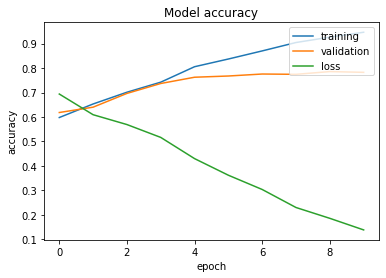

In [8]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

In [9]:
base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

base_model.trainable = False

inputs = keras.Input(shape=(224, 224, 3))

# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)

x = keras.layers.GlobalAveragePooling2D()(x)

# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.Dense(256, activation='relu')(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)

58900480/58889256 [==============================] - 1s 0us/step


In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=[tf.keras.metrics.BinaryAccuracy()])


epochs = 1

es = EarlyStopping(monitor='val_binary_accuracy', mode='max', verbose=1, patience=3, restore_best_weights=True)

h = model.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

201/201 [==============================] - 62s 298ms/step - loss: 4.4484 - binary_accuracy: 0.9624 - val_loss: 3.7740 - val_binary_accuracy: 0.9694
